In [82]:
import matplotlib.pyplot as plt
import lhapdf
import numpy as np
import json
import math
import pylab
import sys

In [83]:
set_cteq6 = lhapdf.getPDFSet("cteq6l1")
set_jam20ff = lhapdf.getPDFSet("JAM20-SIDIS_FF_pion_nlo")
#set_cteq6 = lhapdf.getPDFSet("JAM20-SIDIS_FF_proton_nlo")
p_cteq6 = set_cteq6.mkPDFs()
p_jam20ff = set_jam20ff.mkPDFs()


LHAPDF 6.4.0 loading all 1 PDFs in set cteq6l1
cteq6l1, version 4; 1 PDF members
LHAPDF 6.4.0 loading all 196 PDFs in set JAM20-SIDIS_FF_pion_nlo
JAM20-SIDIS_FF_pion_nlo, version 2; 196 PDF members


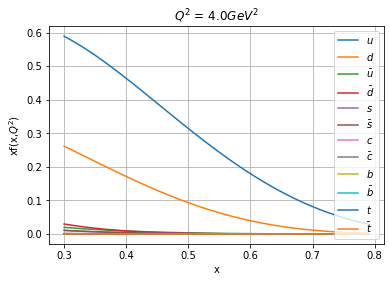

In [118]:
# Q2=[4,4.75,5,5.75,6.09,5.0]
Q2=[4.0,3.898,4.75,4.764,5.5, 4.5]
#Q2=[4.0,3.898,4.75,4.764,10, 4.5]
#Q=math.sqrt(Q2[4])
Q=math.sqrt(Q2[0])

#x_axis = np.arange(0.01,0.99,0.01)
x_axis = np.arange(0.3,0.8,0.01)
#For PDFS
ux=[]
ubarx=[]
dx=[]
dbarx=[]
sx=[]
sbarx=[]
cx=[]
cbarx=[]
bx=[]
bbarx=[]
tx=[]
tbarx=[]
gx=[]
sumratio=[]
dratio=[]
#For FFs
fav=[]
unfav=[]
#unfav_over_fav_ratio=[]
#favff=[]
#unfavff=[]

for x in np.arange(0.3,0.8,0.01):
#for x in np.arange(0.3,0.99,0.01):
#for x in np.arange(0.3,0.35,0.01):
#PDFS
    ux.append(p_cteq6[0].xfxQ(2,x,Q))
    dx.append(p_cteq6[0].xfxQ(1,x,Q))
    ubarx.append(p_cteq6[0].xfxQ(-2,x,Q))
    dbarx.append(p_cteq6[0].xfxQ(-1,x,Q))
    sx.append(p_cteq6[0].xfxQ(3,x,Q))
    sbarx.append(p_cteq6[0].xfxQ(-3,x,Q))
    cx.append(p_cteq6[0].xfxQ(4,x,Q))
    cbarx.append(p_cteq6[0].xfxQ(-4,x,Q))
    bx.append(p_cteq6[0].xfxQ(5,x,Q))
    bbarx.append(p_cteq6[0].xfxQ(-5,x,Q))
    tx.append(p_cteq6[0].xfxQ(6,x,Q))
    tbarx.append(p_cteq6[0].xfxQ(-6,x,Q))
    gx.append(p_cteq6[0].xfxQ(21,x,Q))
    ##FFs
    fav.append(p_jam20ff[0].xfxQ(2,x,Q))
    unfav.append(p_jam20ff[0].xfxQ(1,x,Q))
    

fig = plt.figure()  
ax=fig.add_subplot()
#ax.set_xscale('log')
plt.plot(x_axis,ux,label=r"$u$")
plt.plot(x_axis,dx,label=r"$d$")
plt.plot(x_axis,ubarx,label=r"$\bar u$")
plt.plot(x_axis,dbarx,label=r"$\bar d$")
plt.plot(x_axis,sx,label=r"$s$")
plt.plot(x_axis,sbarx,label=r"$\bar s$")
plt.plot(x_axis,cx,label=r"$c$")
plt.plot(x_axis,cbarx,label=r"$\bar c$")
plt.plot(x_axis,bx,label=r"$b$")
plt.plot(x_axis,bbarx,label=r"$\bar b$")
plt.plot(x_axis,tx,label=r"$t$")
plt.plot(x_axis,tbarx,label=r"$\bar t$")
#plt.plot(x_axis,gx,label=r"$gluon$")
#plt.axis([0.3, 0.8, 0, 1])

plt.xlabel("x")
#plt.ylabel(0,1)
plt.ylabel(r"xf(x,$Q^2$)")
Q2_str =str(Q*Q)
plt.title(r"$Q^2$ = "+Q2_str[0:5] +"$GeV^2$")
plt.legend()
plt.grid()
pylab.show()




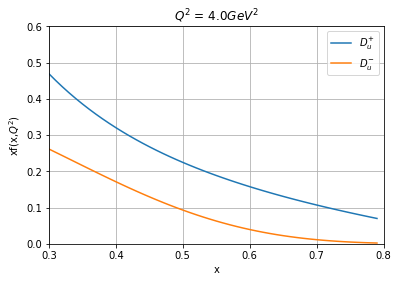

In [119]:

fig = plt.figure()  
ax=fig.add_subplot()
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.plot(x_axis,fav,label=r"$D_{u}^{+}$")
plt.plot(x_axis,dx,label=r"$D_{u}^{-}$")
#plt.axis([0, 1, 0, 8])
plt.axis([0.3, 0.8, 0, 0.6])
plt.xlabel("x")
plt.ylabel(r"xf(x,$Q^2$)")
Q2_str =str(Q*Q)
plt.title(r"$Q^2$ = "+Q2_str[0:5] +"$GeV^2$")
plt.legend()
plt.grid()
pylab.show()


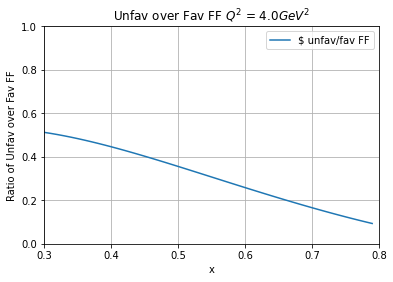

In [120]:
#Ratio of FF
favff=np.asarray(fav)
unfavff=np.asarray(unfav)
unfav_over_fav_ratio=(unfavff/favff)
x_axis=np.arange(0.3,0.8,0.01)#This range should be same everywhere
#print(unfav_over_fav_ratio)
#print(x_axis)
#plt.plot(x_axis,unfav_over_fav_ratio,label="$HI$")  #"$\frac{D_{u}^{-}}{D_{u}^{+}}$") 
plt.axis([0.3, 0.8, 0, 1])
plt.plot(x_axis,unfav_over_fav_ratio,label="$ unfav/fav FF") 
plt.xlabel("x")
plt.ylabel("Ratio of Unfav over Fav FF")
plt.title("Unfav over Fav FF $Q^2$ = "+Q2_str[0:5] +"$GeV^2$")
plt.grid()
plt.legend()

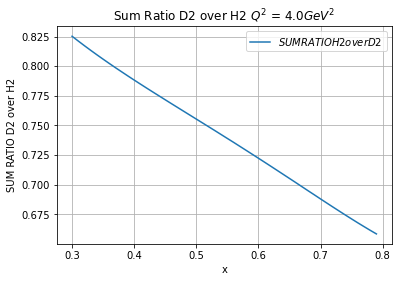

In [121]:
u=np.asarray(ux)
d=np.asarray(dx)
ubar=np.asarray(ubarx)
dbar=np.asarray(dbarx)
uv=u-ubar
dv=d-dbar

#sumratio=(4*u+4*ubar+d+dbar)/(5*(u+d+ubar+dbar))
sumratio=(5*(u+d+ubar+dbar))/(4*u+4*ubar+d+dbar)/2.0#2 for per nucleon
dratio = (3*(u-ubar+d-dbar))/(4*(u-ubar)-(d-dbar))/2.0
x_axis= np.arange(0.3, 0.8, 0.01)
#x_axis1= np.arange(0.34, 0.35, 0.01)
#plt.plot(x_axis1,diffratio,label = "$SUM RATIO H2 over D2$")
#print(x_axis1, sumratio)
#print(x_axis)
#print(sumratio)
plt.plot(x_axis,sumratio,label = "$SUM RATIO H2 over D2$")
plt.xlabel("x")#or "x"
#font = {'family':'serif','size':206, 'serif': ['computer modern roman']}
plt.ylabel("SUM RATIO D2 over H2")
plt.title("Sum Ratio D2 over H2 $Q^2$ = "+Q2_str[0:5] +"$GeV^2$")
plt.grid()
plt.legend()
#print(x_axis1, sumratio)
#file_path = 'randomfile.txt'
#sys.stdout = open(file_path, "w")
#print(x_axis1, sumratio)

In [126]:
uv_over_u = uv/u#to see how much uv differ from u
dv_over_d = dv/d#to see how much dv differ from d

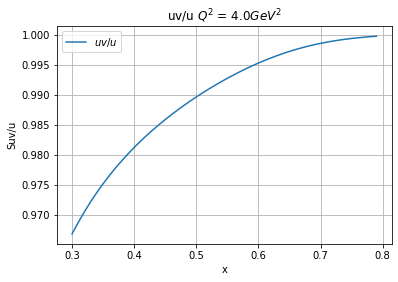

In [128]:
plt.plot(x_axis,uv_over_u,label = "$uv/u$")
plt.xlabel("x")#or "x"
plt.ylabel("uv/u")
plt.title("uv/u for $Q^2$ = "+Q2_str[0:5] +"$GeV^2$")
plt.grid()
plt.legend()

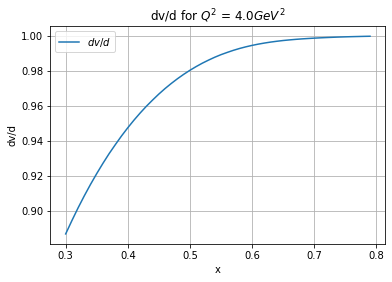

In [130]:
plt.plot(x_axis,dv_over_d,label = "$dv/d$")
plt.xlabel("x")#or "x"
plt.ylabel("dv/d")
plt.title("dv/d for $Q^2$ = "+Q2_str[0:5] +"$GeV^2$")
plt.grid()
plt.legend()

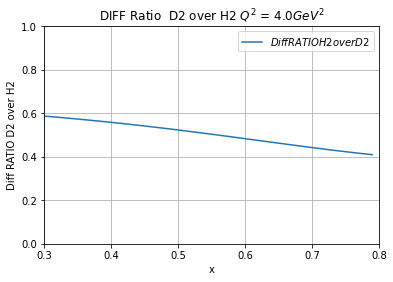

In [131]:
u=np.asarray(ux)
d=np.asarray(dx)
ubar=np.asarray(ubarx)
dbar=np.asarray(dbarx)
plt.axis([0.3, 0.8, 0, 1])
plt.plot(x_axis,dratio,label = "$Diff RATIO H2 over D2$")
#print(x_axis1,dratio)
#print(x_axis)
#print(dratio)

plt.xlabel("x")#or "x"
plt.ylabel("Diff RATIO D2 over H2")
plt.title("DIFF Ratio  D2 over H2 $Q^2$ = "+Q2_str[0:5] +"$GeV^2$")
plt.grid()
plt.legend()

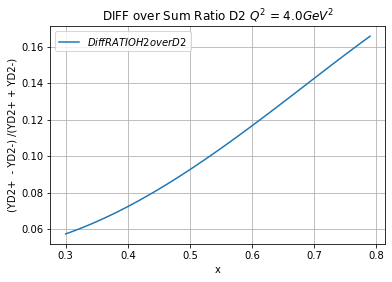

In [132]:
#(YD+  -   YD-)/(YD+   + YD-) = [(uv+dv)(Du+  - Du-)/(5*(u+d+ubar+dbar)(Du+ + Du-))]
yield_diff_over_sum_D2_num = (uv+dv)*(favff - unfavff)
# #The following is trial with uv =u and d=d
#yield_diff_over_sum_D2_num = (u+d)*(favff - unfavff)

yield_diff_over_sum_D2_den = 5*(u+d+ubar+dbar)*(favff+unfavff)
d2_diff_over_sum = yield_diff_over_sum_D2_num / yield_diff_over_sum_D2_den
x_axis1 = np.arange(0.3,0.8,0.01)
#plt.axis([0.2, 0.75, 0, 1])
plt.plot(x_axis,d2_diff_over_sum,label = "$Diff RATIO H2 over D2$")
plt.xlabel("x")#or "x"
plt.ylabel("(YD2+  - YD2-) /(YD2+ + YD2-)")
plt.title("DIFF over Sum Ratio D2 $Q^2$ = "+Q2_str[0:5] +"$GeV^2$")
plt.grid()
plt.legend()

# 